In [1]:
import os, json
import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

from qcutils.credential import load_provider
from qcutils.pulse.basispulse import BasisPulse
import matplotlib.pyplot as plt
import numpy as np

provider = load_provider()
backend = provider.get_backend("ibm_lagos")

In [2]:
bp = BasisPulse(backend)

In [26]:
def get_param_list(backend, instruction, param_name):
    bp = BasisPulse(backend)
    param_list = []
    if instruction == 'cx':
        if param_name == "duration":
            for coupling in backend.configuration().coupling_map:
                param_list.append(backend.defaults().instruction_schedule_map.get("cx", coupling).duration)
        else:
            raise Exception("For CX, only support duration")
    else:
        for qubit in range(backend.configuration().n_qubits):
            for ch, param_l in bp.get_basis_gate_parameters(instruction, qubit).items():
                params = param_l[0]
                param_list.append(params[param_name])

    return param_list

In [46]:
backend_name_list = ["ibmq_lima", "ibmq_belem", "ibmq_quito", "ibmq_manila", "ibmq_jakarta", "ibm_nairobi", "ibm_lagos", "ibm_perth", "ibm_oslo"]

x_amp_list = [get_param_list(provider.get_backend(backend_name), "x", "amp") for backend_name in backend_name_list]
sx_amp_list = [get_param_list(provider.get_backend(backend_name), "sx", "amp") for backend_name in backend_name_list]
cx_duration_list = [get_param_list(provider.get_backend(backend_name), "cx", "duration") for backend_name in backend_name_list]

In [68]:
def boxplot_params(backend_name_list, instruction, param_name):
    data = [get_param_list(provider.get_backend(backend_name), instruction, param_name) for backend_name in backend_name_list]
    plt.boxplot(data)
    plt.xticks(range(1, len(backend_name_list) + 1), backend_name_list, rotation=90)

    if instruction == "x":
        instruction = "X"
    elif instruction == "sx":
        instruction = "SX"
    elif instruction == "cx":
        instruction = "CX"

    if param_name == "amp":
        param_name = "Amplitude"
    elif param_name == "duration":
        param_name = "Duration"

    plt.ylabel(f"{instruction} {param_name}")
    plt.tight_layout()

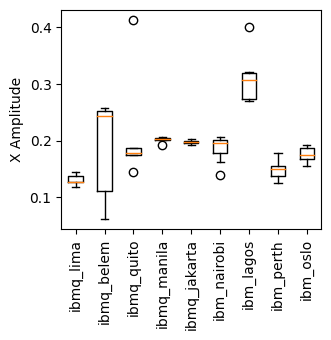

In [65]:
instruction = "x"
param_name = "amp"

plt.figure(figsize=(3.5, 3.5), dpi=100)
boxplot_params(backend_name_list, instruction, param_name)
plt.savefig(f"./fig/backend_info/{instruction}_{param_name}.pdf")

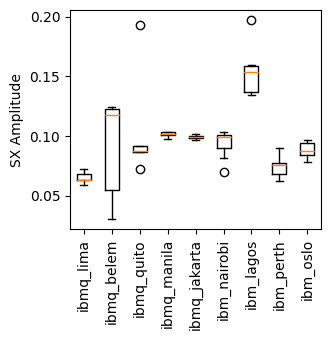

In [69]:
instruction = "sx"
param_name = "amp"

plt.figure(figsize=(3.5, 3.5), dpi=100)
boxplot_params(backend_name_list, instruction, param_name)
plt.savefig(f"./fig/backend_info/{instruction}_{param_name}.pdf")

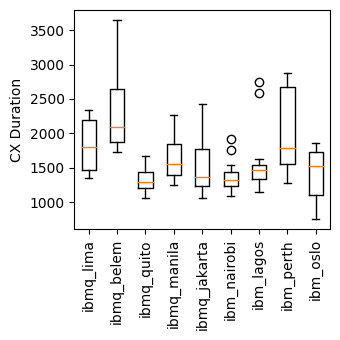

In [70]:
instruction = "cx"
param_name = "duration"

plt.figure(figsize=(3.5, 3.5), dpi=100)
boxplot_params(backend_name_list, instruction, param_name)
plt.savefig(f"./fig/backend_info/{instruction}_{param_name}.pdf")